In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
537,919812,B,11.69,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,...,12.98,32.19,86.12,487.7,0.17680,0.32510,0.13950,0.13080,0.2803,0.09970
138,868826,M,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,18.55,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147
91,861799,M,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,...,16.43,25.84,107.50,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828
471,9113816,B,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,...,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639
85,8612399,M,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.08795,...,22.93,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,15.14,23.60,98.84,708.8,0.12760,0.13110,0.17860,0.09678,0.2506,0.07623
503,915143,M,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,...,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
98,862485,B,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,...,13.06,17.16,82.96,512.5,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.14150,0.46650,0.70870,0.22480,0.4824,0.09614
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


In [3]:
df.shape

(569, 32)

The dataset contains information about breast tumors. The diagnosis column indicates whether the tumor is cancerous (M - malignant) or not cancerous (B - benign).

In [4]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


We will replace these values into 0 and 1.

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


Cleaning and Visualization

In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [10]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [11]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


/tmp/ipython-input-2251805760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


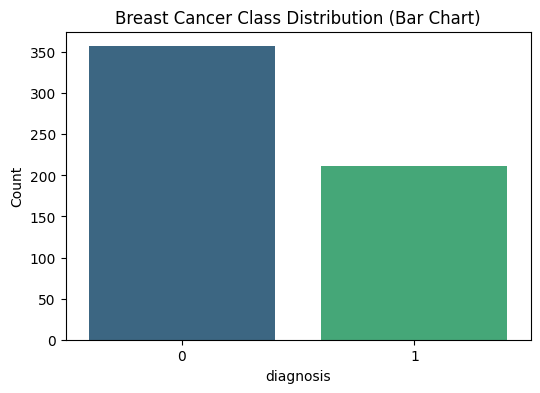

In [12]:
counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Breast Cancer Class Distribution (Bar Chart)')
plt.ylabel('Count')
plt.show()

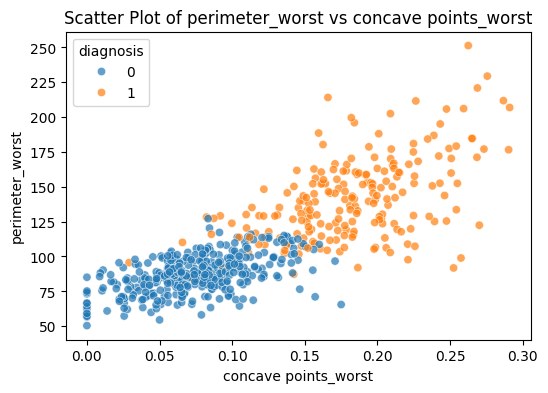

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(
data=df,
x='concave points_worst',
y='perimeter_worst',
hue='diagnosis',
alpha=0.7
)
plt.title('Scatter Plot of perimeter_worst vs concave points_worst')
plt.show()

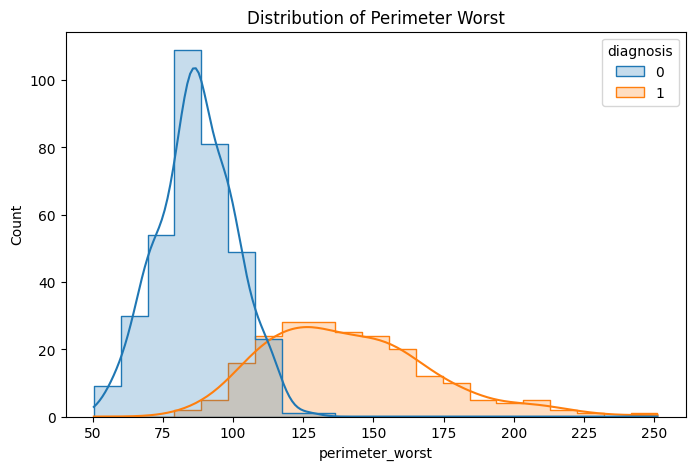

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis', kde=True, element='step')
plt.title('Distribution of Perimeter Worst')
plt.show()

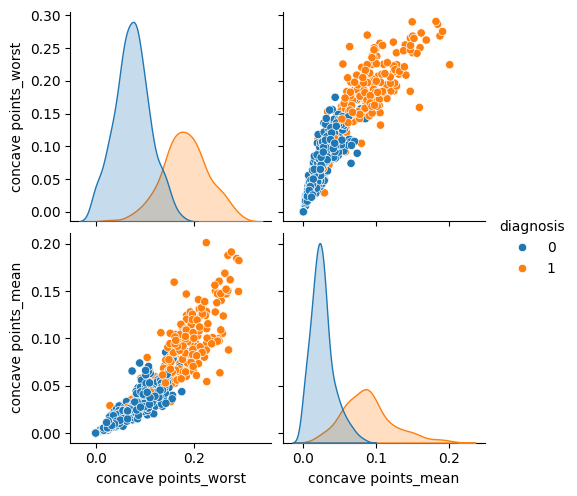

In [15]:
sns.pairplot(df[['diagnosis','concave points_worst',
                 'concave points_mean']],
             hue='diagnosis', diag_kind='kde')
plt.show()

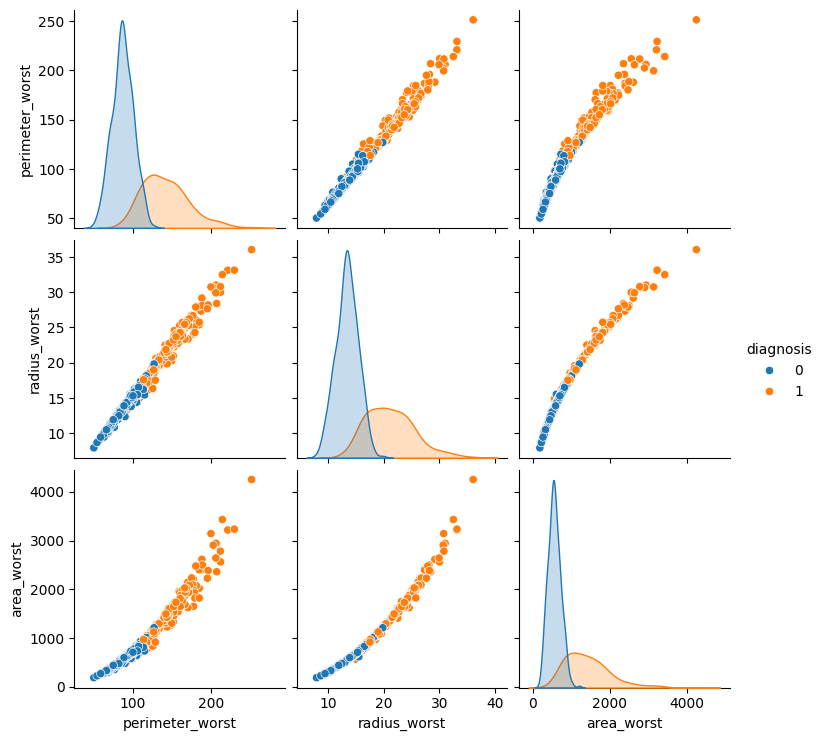

In [16]:
sns.pairplot(df[['diagnosis','perimeter_worst','radius_worst','area_worst']],
             hue='diagnosis', diag_kind='kde')
plt.show()

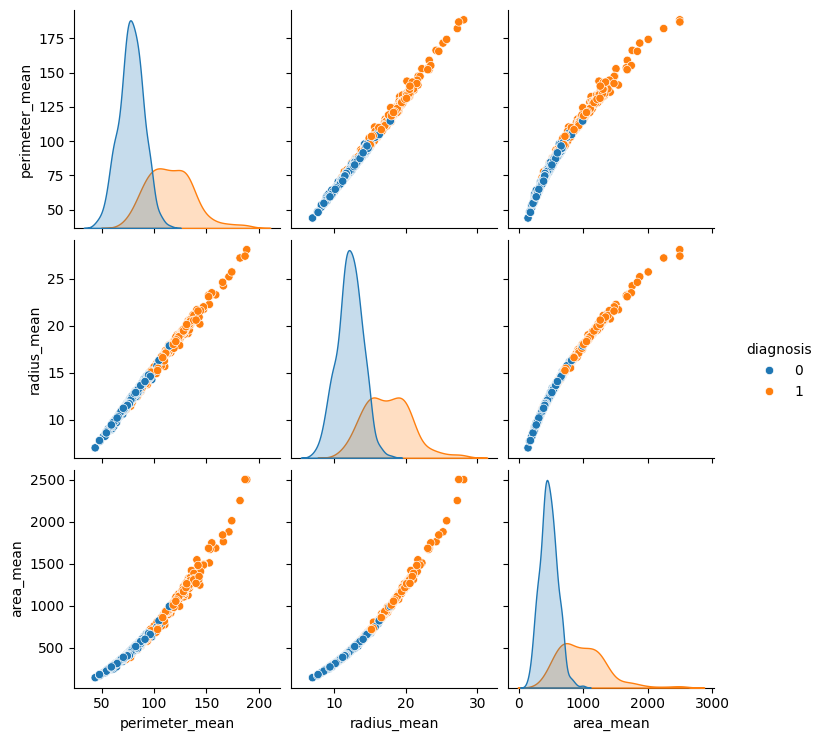

In [17]:
sns.pairplot(df[['diagnosis','perimeter_mean','radius_mean','area_mean']],
             hue='diagnosis', diag_kind='kde')
plt.show()

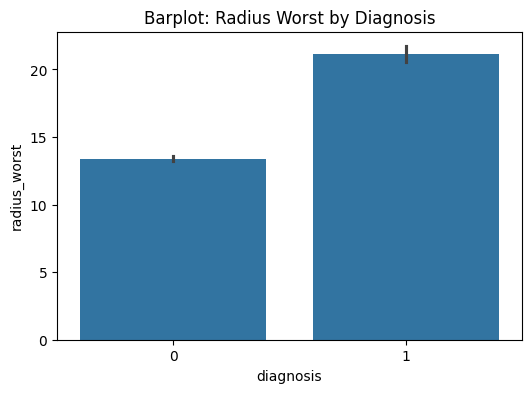

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='diagnosis', y='radius_worst')
plt.title('Barplot: Radius Worst by Diagnosis')
plt.show()

In [19]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## ML

**KNN**

In [21]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
y_predict = knn.predict(X_test)

## Model evaluation

### Jaccard index

In [23]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.875)

### Confusion matrix

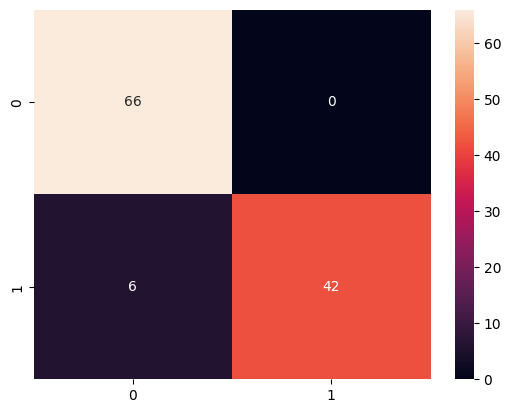

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [25]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 6, 42]])

### Precision, recall, F1

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.875
f1=0.9333333333333333
accuracy=0.9473684210526315


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Cross-validation

In [28]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       357
           1       0.99      0.92      0.96       212

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.97       569
weighted avg       0.97      0.97      0.97       569



### Grid Search

 Detiction k

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [30]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [31]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

In [32]:
knn_gscv.best_score_

np.float64(0.968390001552554)

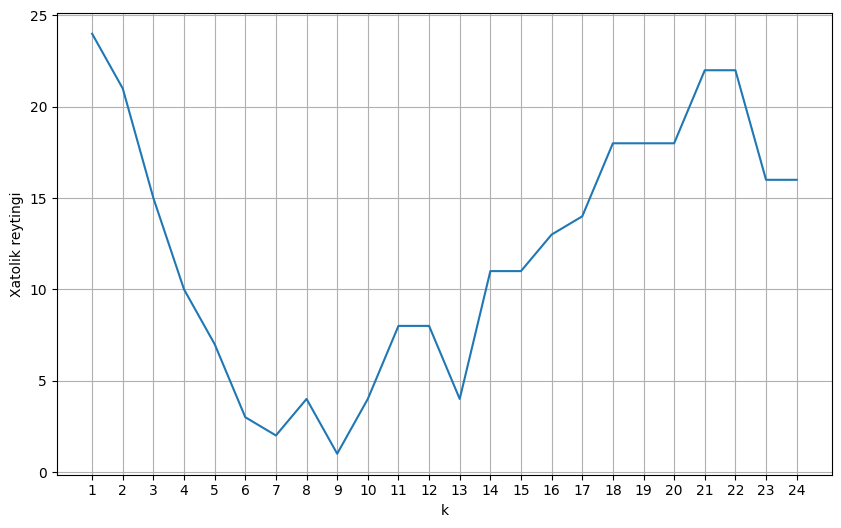

In [33]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

**XGBoost model**

In [34]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=14,
    random_state=12,
    use_label_encoder=False,
    eval_metric='logloss'
)


xgb.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:09:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_predicted = xgb.predict(X_test)

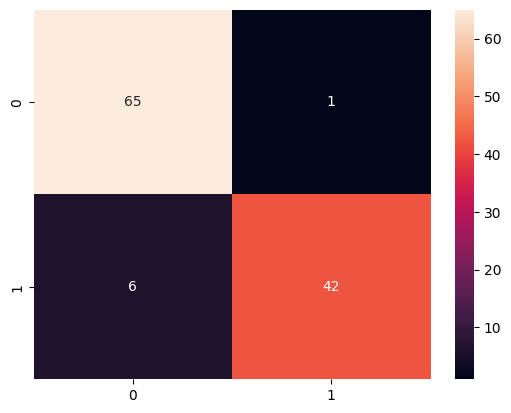

In [36]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9767441860465116
recall=0.875
f1=0.9230769230769231
accuracy=0.9385964912280702


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        66
           1       0.98      0.88      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [39]:
jaccard_score(y_test, y_predicted)

np.float64(0.8571428571428571)

**LogisticRegression**

In [51]:
log_reg = LogisticRegression(max_iter=500, solver='liblinear', random_state=12)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

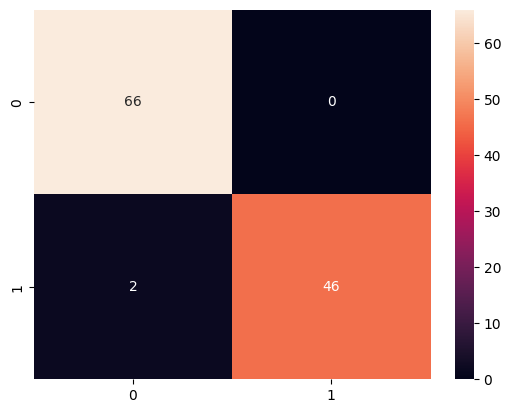

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [53]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.9583333333333334
f1=0.9787234042553191
accuracy=0.9824561403508771


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [55]:
jaccard_score(y_test, y_pred)

np.float64(0.9583333333333334)

In [56]:
# Random Forest modeli
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=12
)

# Modelni o‘qitish
rf.fit(X_train, y_train)

# Bashorat qilish
y_pred = rf.predict(X_test)

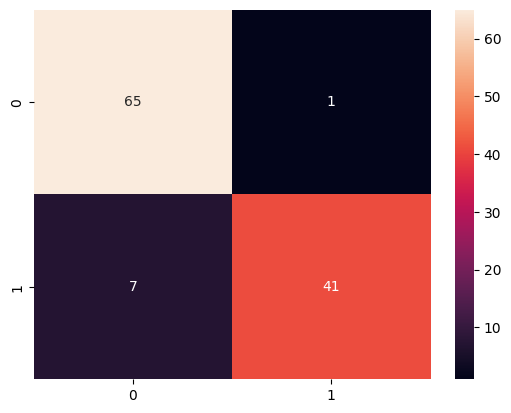

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [58]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9761904761904762
recall=0.8541666666666666
f1=0.9111111111111111
accuracy=0.9298245614035088


In [48]:
jaccard_score(y_test, y_pred)

np.float64(0.8367346938775511)